In [361]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import math
import seaborn as sb
from matplotlib import pyplot as plt

In [362]:
# loads and read csv file
df_original=pd.read_csv("bank.csv",delimiter=";")
df =df_original
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [363]:
# checks data types of columns
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [364]:
# checks for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [366]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [367]:
# checks for duplicate values
df.duplicated().sum()

0

In [368]:
# display column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [369]:
# replacing categorical data with binary values
df.replace(['yes','no'],[1,0],inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [370]:
# display shape of the dataframe
df.shape

(4521, 17)

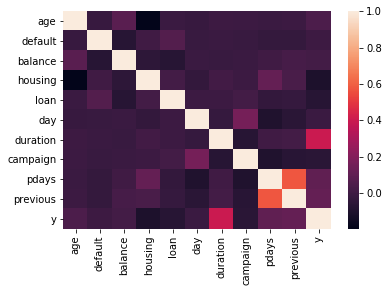

In [371]:
# checks correlation with all columns
corr=df.corr()
sb.heatmap(corr)

In [372]:
# checks correlation with all columns
print(corr['y'].sort_values(ascending=False)[:])

y           1.000000
duration    0.401118
previous    0.116714
pdays       0.104087
age         0.045092
balance     0.017905
default     0.001303
day        -0.011244
campaign   -0.061147
loan       -0.070517
housing    -0.104683
Name: y, dtype: float64


In [373]:
# return unique values in given column
df['y'].unique()

array([0, 1])

In [374]:
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

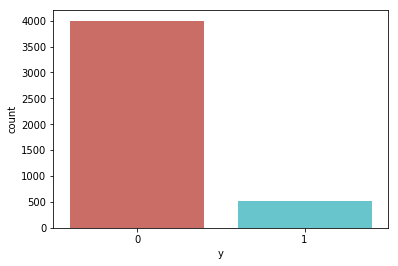

In [375]:
sb.countplot(x='y',data=df,palette='hls')

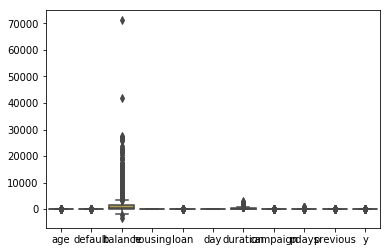

In [376]:
sb.boxplot(data=df)

/home/ubuntu/anaconda3/envs/testindatavenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


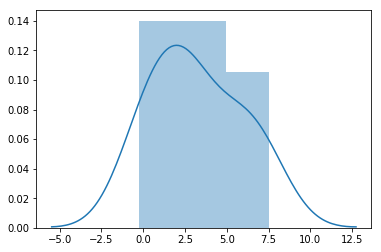

In [377]:
# display skewness of dataframe
target=df.skew()
sb.distplot(target)

In [378]:
df.shape

(4521, 17)

In [379]:
# convert categorical data into dummy (binary)  variables 
df=pd.get_dummies(df)

In [380]:
# scales the limit of variable
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [381]:
df = Feature_Scaling(df)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.161765,0.0,0.068455,0.0,0.0,0.600000,0.024826,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.205882,0.0,0.108750,1.0,1.0,0.333333,0.071500,0.000000,0.389908,0.16,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.500000,0.059914,0.000000,0.379587,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.161765,0.0,0.064281,1.0,1.0,0.066667,0.064548,0.061224,0.000000,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.588235,0.0,0.044469,1.0,0.0,0.133333,0.073486,0.000000,0.000000,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [382]:
# splits the data in 70% & 30% format
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
        
    return train,test

train,test = Split(df)

In [383]:
train_data=df.head(train)
test_data=df.tail(test)

In [384]:
# Separating the output(label) and the parameters(features) of dataframe
def separate(df):
    output = df.y
    return df.drop('y', axis=1), output

x_data_train,y_data_train = separate(train_data)

In [385]:
x_data_test,y_data_test=separate(test_data)

In [386]:
x_data_test,y_data_test=separate(test_data)

In [387]:
class MultiLayerNeural:
    def __init__(self):
        self.alpha = 0.221
        self.epoch = 1000
    
        
    def Train(self,x_train_data, y_train_data):
        weight=[]
        bias=[]
        
        # Initializing layers
        layers=[x_train_data.shape[1],4,5,3,1]
        db=0.0
        a = [0] * len(layers)
        z = [0] * len(layers)
        A = [0] * len(layers)
        dg = [0] * len(layers)
        da = [0] * len(layers)
        dz = [0] * len(layers)
        db = [0] * len(layers)
        dw = [0] * len(layers)
        
        a[0]=x_train_data.T
        
        # Initializing weights and bias for all layers     
        for i in range(len(layers)):
            weight.append(np.random.rand(layers[i],layers[i-1])*0.01)
            bias.append(np.zeros(((layers[i],1))))    
    
        # forward propagation         
        for length in range(self.epoch):
            for i in range(1,len(layers)):
                z[i] = np.dot(weight[i],a[i-1])+bias[i]
                a[i] = (1 / (1 + np.exp(-z[i])))
            
        # backward propagation  
            for i in reversed(range(1,len(layers))):
                da[i]=(-(y_train_data.T/a[i])+((1-y_train_data.T)/(1-a[i])))
                dg[i] = (1 / (1 + np.exp(-z[i]))) * (1 - (1 / (1 + np.exp(-z[i]))))
                dz[i]=da[i]*dg[i]
                dw[i]=(np.dot(dz[i],a[i-1].T)/len(x_train_data))
                db[i]=(np.sum(dz[i],axis=1,keepdims=True)/len(x_train_data))
                weight[i]=(weight[i]-(np.dot(self.alpha,dw[i])))
                bias[i]=(bias[i]-(np.dot(self.alpha,db[i])))
        return weight,bias

    def Test_data(self, x_test_data, weight,bias): 
        layers=[x_test_data.shape[1],4,5,3,1]
        
        a = [0] * len(layers)
        z = [0] * len(layers)
        a[0]=x_test_data.T
        
        # testing test data on Activation/Hypothesis Function 
        for i in range(1,len(layers)):
            z[i] = np.dot(weight[i],a[i-1])+bias[i]
            a[i] = (1 / (1 + np.exp(-z[i])))
#         print(len(a))
        return a[-1]
           
    def Accuracy(self, y_test_data, y_predict):
        y_predict = np.nan_to_num(y_predict)
   
        test_accuracy = 100 - (np.mean(np.abs(y_predict - y_test_data)) * 100)        
        return test_accuracy

def main():
    # creates class object 
    obj = MultiLayerNeural()
    
    # convert data into numpy array     
    x_train_data = np.array(x_data_train)
    y_train_data = np.array(y_data_train)
    y_train_data = y_train_data.reshape(len(y_train_data),1)
        
    x_test_data = np.array(x_data_test)
    y_test_data = np.array(y_data_test)
    y_test_data = y_test_data.reshape(len(y_test_data),1)
    
#     print("x_train_data",x_train_data.shape)
#     print("y_train_data",y_train_data.shape) 
#     print("x_test_data",x_test_data.shape)
#     print("y_test_data",y_test_data.shape)  
    
       
    # calling method by class object to get weights and bias
    weights,b = obj.Train(x_train_data, y_train_data)

    # getting prediction values    
    y_predict_train = obj.Test_data(x_train_data, weights,b)
    y_predict_test = obj.Test_data(x_test_data, weights,b)

    # getting accuracy     
    acc_train=obj.Accuracy(y_predict_train,y_train_data)
    print("\n\naccuracy of train data=",acc_train)
    
    acc_test=obj.Accuracy(y_predict_test,y_test_data)
    print("accuracy of test data=",acc_test)
    
if __name__ == '__main__':
    main()
    



accuracy of train data= 79.51793128646328
accuracy of test data= 79.63089437909254
